import pandas as pd
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line


# Analysis

In [15]:
import warnings
from functions import *
import pickle
sns.set(style="whitegrid")

## Stoppages per game

In [16]:
stoppage_df = pd.read_csv("../data/stoppages.csv", index_col=0)
stoppage_avg = stoppage_df.groupby(['period']).Stoppage.mean()
stoppage_avg

period
1    7.547282
2    7.821321
3    7.665658
Name: Stoppage, dtype: float64

In [17]:
stoppages_proposals = generate_three_proposals(stoppage_avg)
stoppage_proposal_df = proposals_to_df(stoppages_proposals, "Stoppages")

## Takeaways

In [18]:
takeaways_df = pd.read_csv("../data/takeaways.csv", index_col=0)
takeaways_avg = takeaways_df.groupby(['period']).Takeaway.mean()
takeaways_avg

period
1    2.595429
2    2.479551
3    2.404253
Name: Takeaway, dtype: float64

In [19]:
takeaways_proposals = generate_three_proposals(takeaways_avg)
takeaway_df = proposals_to_df(takeaways_proposals, "Takeaways")

## Giveaways

In [20]:
giveaways_df = pd.read_csv("../data/giveaways.csv", index_col=0)
giveaways_avg = giveaways_df.groupby(['period']).Giveaway.mean()
giveaways_avg

period
1    3.108809
2    2.874962
3    2.690820
Name: Giveaway, dtype: float64

In [21]:
giveaways_proposals = generate_three_proposals(giveaways_avg)
giveaway_df = proposals_to_df(giveaways_proposals, "Giveaways")

## Hits

In [22]:
hit_avgs = get_category_and_period_avg('Hit')
hit_avgs

period
1    8.450547
2    7.119211
3    6.044054
Name: Hit, dtype: float64

In [23]:
hits_proposals = generate_three_proposals(hit_avgs)
hit_df = proposals_to_df(hits_proposals, "Hits")

## Penalties

In [24]:
penalties_df = pd.read_csv("../data/penalties.csv", index_col=0)
penalty_avgs = penalties_df.groupby(['period']).penalty.mean()
penalty_avgs

period
1    1.870265
2    2.009175
3    1.932623
Name: penalty, dtype: float64

In [25]:
penalties_proposals = generate_three_proposals(penalty_avgs)
penalty_df = proposals_to_df(penalties_proposals, "Penalties")

## Shots

In [26]:
shots_df = pd.read_csv("../data/shots.csv", index_col=0)
shot_avgs = shots_df.groupby(['period']).shot.mean()
shot_avgs

period
1    8.527795
2    8.857232
3    8.059598
Name: shot, dtype: float64

In [27]:
shots_proposals = generate_three_proposals(shot_avgs)
shot_df = proposals_to_df(shots_proposals, "Shots")

## Blocked Shots

In [28]:
blocked_shots_df = pd.read_csv("../data/blocked_shots.csv", index_col=0)
blocked_shots_avgs = blocked_shots_df.groupby(['period'])['Blocked Shot'].mean()
blocked_shots_avgs

period
1    4.454365
2    4.437850
3    4.197767
Name: Blocked Shot, dtype: float64

In [29]:
blocked_shots_proposals = generate_three_proposals(blocked_shots_avgs)
blocked_shot_df = proposals_to_df(blocked_shots_proposals, "Blocked_Shots")

## Save Percentage

In [30]:
with open ("../data/save_pct_list", 'rb') as f:
    save_pct_list = pickle.load(f)

In [31]:
save_pct_list

[0.9087, 0.8959, 0.8878]

In [32]:
save_pct_df = pd.DataFrame(data = save_pct_list, columns = ["Save_Percentage"])
save_pct_df['Period'] = [1, 2, 3]

In [33]:
# save_pct_df.to_csv("../data/save_pct_df.csv")

## Goals

In [34]:
goals_df = pd.read_csv("../data/goals.csv",index_col=0)
goal_avgs = goals_df.groupby(['period']).goal.mean()
goal_avgs

period
1    1.459230
2    1.532012
3    1.506890
Name: goal, dtype: float64

In [36]:
# 5% more goals in second than first 
goal_avgs[2] / goal_avgs[1]

1.049877555237007

In [37]:
goals_proposals = generate_three_proposals(goal_avgs)
goal_df = proposals_to_df(goals_proposals, "Goals")

## Shift Length

### All Positions

In [38]:
shifts_df = pd.read_csv("../data/all_positions_shifts.csv", header=None)
shifts_df.columns = ['period', 'shift_length', 'position', 'game_id']

In [39]:
shifts_avgs = shifts_df.groupby(['period', 'position']).shift_length.mean()
shifts_avgs

period  position
1       C           43.056593
        D           45.123369
        LW          43.322835
        RW          43.345602
2       C           46.336745
        D           49.971268
        LW          46.538081
        RW          46.609662
3       C           44.195191
        D           46.909917
        LW          44.446559
        RW          44.497024
Name: shift_length, dtype: float64

#### How many seconds longer are shifts in second period than 1st/3rd?

In [40]:
unstacked_shifts_avgs = shifts_avgs.unstack(level=1)

In [41]:
mean_position_shifts = [sum(unstacked_shifts_avgs[x]) / len(unstacked_shifts_avgs[x]) 
                        for x in unstacked_shifts_avgs.columns]
mean_position_shifts

[44.529509477631116, 47.33485113026512, 44.769158528823205, 44.817429305181115]

In [42]:
diff_list = []
for col in unstacked_shifts_avgs.columns:
    first = unstacked_shifts_avgs[col].iloc[0]
    second = unstacked_shifts_avgs[col].iloc[1]
    diff = round(second - first, 2)
#     diff = second - first
    diff_list.append(diff)

#### What percent of shift length does this change represent?

In [43]:
percent_diff_in_second = [round(x/y, 2) 
                          for x,y in zip(diff_list, mean_position_shifts)]
percent_diff_in_second

[0.07, 0.1, 0.07, 0.07]

# Combining Data For Proposals

In [44]:
proposals_df = pd.concat([stoppage_proposal_df, takeaway_df, giveaway_df, hit_df, shot_df, blocked_shot_df, goal_df, 
                          penalty_df], axis = 1)

In [45]:
transposed_proposals_df = proposals_df.T
transposed_proposals_df.reset_index(inplace=True)
melted_proposals_df = transposed_proposals_df.melt(id_vars = ['index'])

In [46]:
# proposals_df.to_csv("../data/proposals_df.csv")

## Visualizing differences

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Change in Game Stats Based on Proposal Change')

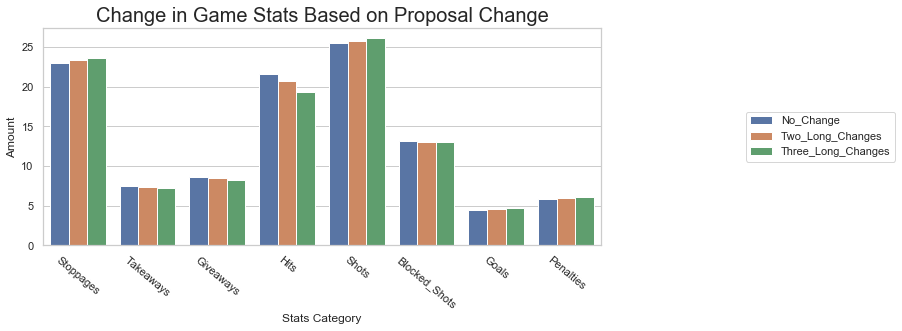

In [47]:
fig = plt.figure(figsize=(10, 4))
ax = sns.barplot(x = "index", y = 'value', hue = 'variable',
    data = melted_proposals_df)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=320)
plt.xlabel("Stats Category")
plt.ylabel("Amount")
plt.title("Change in Game Stats Based on Proposal Change", fontsize=20)
# fig.savefig("../images/Change_in_Game_Stats_Plot.png", bbox_inches = 'tight')